## Loading the Data

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set()

# Import the data
df = pd.read_csv("palmer_penguins.csv")

## Visualizing the Data

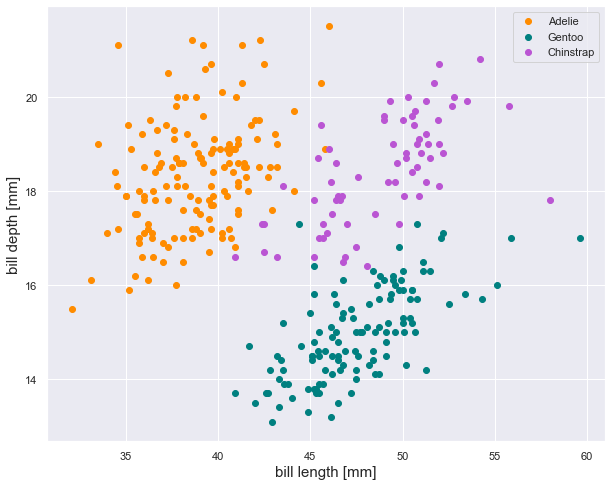

In [33]:
# Plot the data
penguins = ["Adelie", "Gentoo", "Chinstrap"]
colors = ["darkorange", "teal", "mediumorchid"]

# Scatter for bill length vs. bill depth for Adelie, Gentoo and Chinstrap
fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

## Processing the Data

In [ ]:
df = df.dropna()
X = df[["bill_length_mm",
        "bill_depth_mm"]].to_numpy()

y = df["species"].to_numpy()

## Train - Test Split

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

## Constructing the KNN Algorithm

In [3]:
#Creating a function that calculates the Euclidean distance
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))
print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 9.265527507918797


In [4]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [5]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([50.9, 17.9]), 'Chinstrap', 0.4999999999999993],
 [array([51.5, 18.7]), 'Chinstrap', 0.5385164807134515],
 [array([50.8, 18.5]), 'Chinstrap', 0.5830951894845304],
 [array([52. , 18.1]), 'Chinstrap', 0.70710678118655],
 [array([50.8, 19. ]), 'Chinstrap', 0.943398113205661]]

In [6]:
# Show the true label 
y_test[-1]

'Chinstrap'

Looks like it works!

In [7]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [8]:
# Test our function 
KNN_Predict(X_test[-1], X_train, y_train, 5)

'Chinstrap'

Our model works!

In [9]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [11]:
# Test our function
print("The error for KNN with 7 neighbours is ",round(100*classification_error(X_test, y_test, X_train, y_train, 7),2),"%")

The error for KNN with 7 neighbours is  4.55 %


Lets see if we can do better that 4.5%

In [12]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

## Ideal Neighbour Value

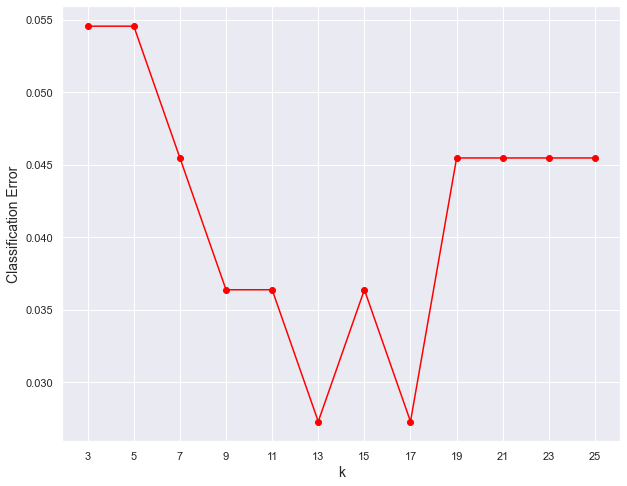

In [35]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

It seems that it is in our best interested to pick the 13-nearest neighbours.

In [14]:
print("The error for KNN with 13 neighbours is ",round(100*classification_error(X_test, y_test, X_train, y_train, 13),2),"%")

The error for KNN with 13 neighbours is  2.73 %


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

options = ['Adelie','Chinstrap']
df_AC = df[df['species'].isin(options)]
X_new = df_AC[["bill_length_mm", "bill_depth_mm"]].to_numpy()


def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1
    
        
# Create target value array
y_new = df_AC["species"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.33, random_state = 13)

# Instantiate a KNN classifier 
clf_new = KNeighborsClassifier(n_neighbors = 13)

In [16]:
clf_new.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Let's see how well the built in KNN classifier does with 13 nearest neighbours.

In [32]:
print(f"clf.predict(X_test) = {clf_new.predict(X_test)} \n")
y_pred = clf_new.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"Successful classification rate is {100*sum(y_pred == y_test)/len(y_test)} %!")

clf.predict(X_test) = [0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0] 

y_pred == y_test = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True] 

Successful classification rate is 100.0 %!


In [18]:
# Calculate the accuracy
clf_new.score(X_test, y_test)

1.0

Pretty good it seems! 100% classification on the test data. KNN is working pretty well for this particular problem.

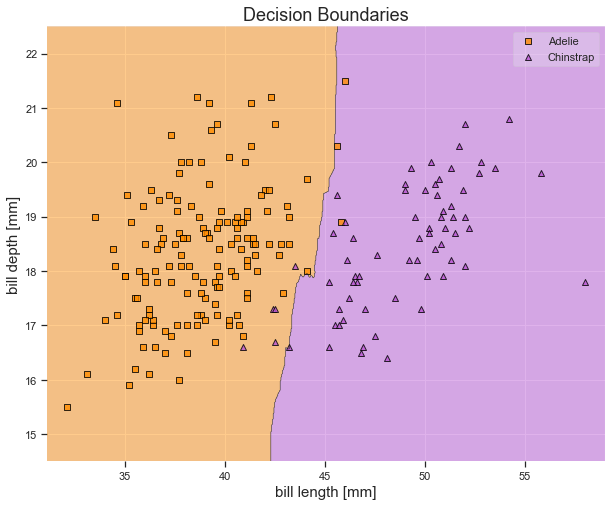

In [22]:
from mlxtend.plotting import plot_decision_regions

#  Visual representation of the knn classifier
plt.figure(figsize = (10, 8))
ax = plot_decision_regions(X_new, y_new, clf = clf_new,colors='darkorange,mediumorchid')
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
handles, labels = ax.get_legend_handles_labels()           
ax.legend(handles, 
          ['Adelie', 'Chinstrap'], 
           framealpha=0.3, scatterpoints=1)   
        
plt.show()

cf_matrix = [[48  0]
 [ 0 23]] 



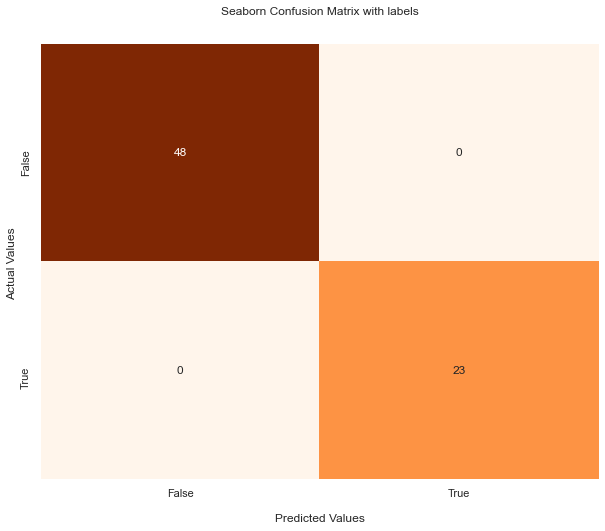

In [23]:
from sklearn.metrics import confusion_matrix
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


# Define the model
clf = KNeighborsClassifier(n_neighbors = 7)

# Fit the model
clf.fit(X_train,y_train)

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap="Oranges", cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [24]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        23

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



We can see that for pretty much every metric knn=13 does pretty well!<br>
<br>
Lets see how this compares with logistic regression.

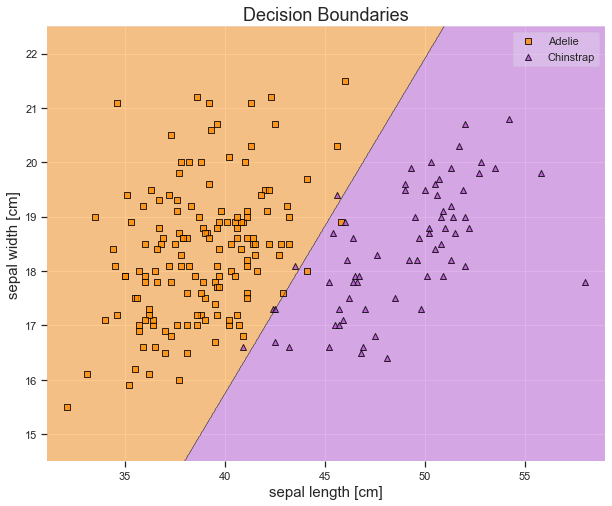

In [25]:
from sklearn.linear_model import LogisticRegression

# Instantiation and trainig of logistic regressor
clf2 = LogisticRegression(max_iter = 10_000)
clf2.fit(X_train, y_train)

# Testing for logistic regressor
log_y_pred = clf2.predict(X_test)

# Visual representation of logistic regression
plt.figure(figsize = (10, 8))
ax = plot_decision_regions(X_new, y_new, clf = clf2,colors='darkorange,mediumorchid')
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
handles, labels = ax.get_legend_handles_labels()           
ax.legend(handles, 
          ['Adelie', 'Chinstrap'], 
           framealpha=0.3, scatterpoints=1) 
plt.show()

cf_matrix = [[48  0]
 [ 1 22]] 



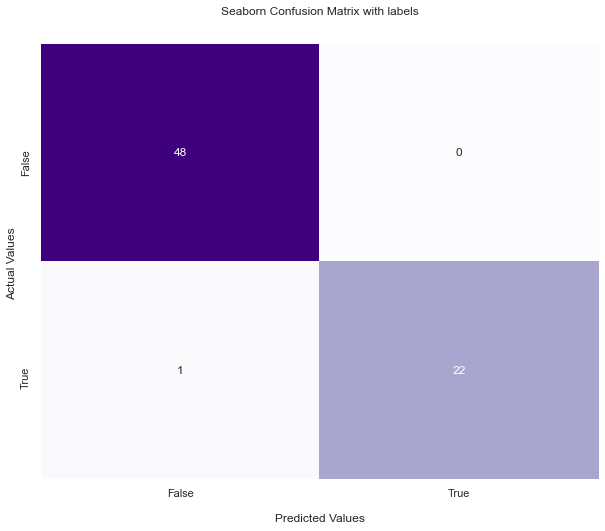

In [26]:
# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, log_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Purples', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [27]:
#Checking performance our model with classification report.
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.96      0.98        23

    accuracy                           0.99        71
   macro avg       0.99      0.98      0.98        71
weighted avg       0.99      0.99      0.99        71



The classification results are amazing but still no match for the KNN classifier which wins hands down. <br>
<br>
Lets see if KNN can do better than a multi layer neural network.

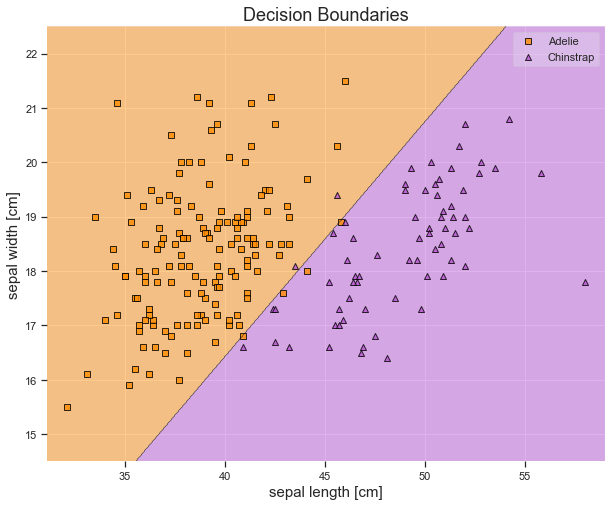

In [28]:
from sklearn.neural_network import MLPClassifier

# Instantiation and training of MLP classifier
clf3 = MLPClassifier(solver='lbfgs', alpha= 0.33,
                   hidden_layer_sizes=(120, 120), random_state=1, max_iter = 50_000)

clf3.fit(X_train, y_train)

# Testing for MLP classifier
net_y_pred = clf3.predict(X_test)

# Visual representation of MLP classifier
plt.figure(figsize = (10, 8))
ax = plot_decision_regions(X_new, y_new, clf = clf3,colors='darkorange,mediumorchid')
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
handles, labels = ax.get_legend_handles_labels()           
ax.legend(handles, 
          ['Adelie', 'Chinstrap'], 
           framealpha=0.3, scatterpoints=1) 
plt.show()

cf_matrix = [[47  1]
 [ 1 22]] 



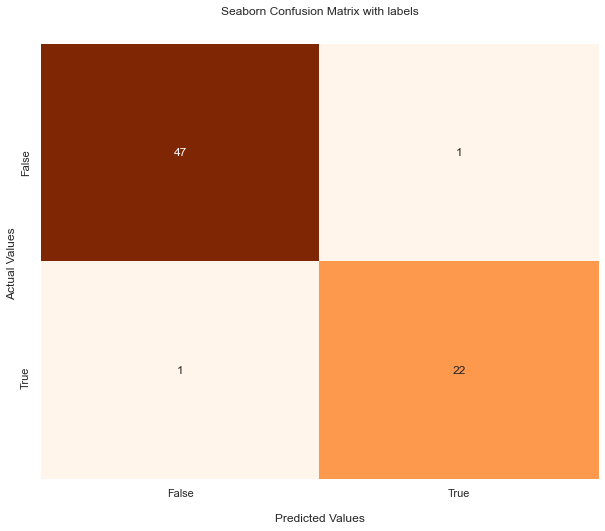

In [29]:
# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, net_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Oranges', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [35]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
print(classification_report(y_test, net_y_pred))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.96      0.96      0.96        23

    accuracy                           0.97        71
   macro avg       0.97      0.97      0.97        71
weighted avg       0.97      0.97      0.97        71



Wow! Not only does MLP do worse than KNN (its still pretty good to note) it even does slightly worse than the logistic classifier. I guess the conclusion to draw from here is that - sometimes complex models like dense neural networks don't necessarily do better than a simpler algorithim. 
<br>
<br>
However, it should also be noted that KNN isn't a perfect algorithim either - just that in some instances (like this one) it can outperform even a neural network.